# Component 1: Tohoku Earthquake Dataset

## 1. Tohoku Earthquake Location Data
We used here the backend **matplotlib nbagg** instead of **matplotlib inline** because'inline' does not support some interactive functions we need later on. __[(1)](https://stackoverflow.com/questions/27704490/interactive-pixel-information-of-an-image-in-python)__ __[(2)](https://matplotlib.org/faq/usage_faq.html)__ 

In [1]:
%matplotlib nbagg

In [2]:
#import the libaries we need to use

import pandas as pd
import matplotlib.pyplot as plt
import numpy as np
import datetime

##  Import display 
from IPython.display import display


### ipywidget libraries
from ipywidgets import HBox, VBox, IntSlider, Play, jslink
from ipywidgets import interact, interactive, fixed, interact_manual
import ipywidgets as widgets

### bqplot libraries
from bqplot import (
    Axis, ColorAxis, LinearScale, DateScale, DateColorScale, OrdinalScale, Mercator, Orthographic,
    OrdinalColorScale, ColorScale, Scatter, Lines, Figure, Tooltip, Map, ColorAxis, AlbersUSA, topo_load
)

In [3]:
#reads into the location.txt file, provides headers
locations=pd.read_table("data/location.txt",names=["longitude","latitude","default1","default2"],sep="\t")

By viewing the tables in the above step, we found out that the two columns 'default1' and 'default2' are irrelevant for our analysis, so we decided to cut them out.

In [4]:
#drop the irrelevant columns default1, defulat 2
locations.drop(["default1","default2"],inplace=True,axis=1)

The number 1000 to 1437 corresponds to the **station**, so we define it here:

In [5]:
locations["station"]=np.arange(1000,1438)

In [6]:
#resetting the index to 'station'
locations.set_index("station", inplace=True)

In [7]:
#A sanity check to see if our index worked, by locating index number 1
locations.loc[1001]

longitude   -98.102
latitude     26.938
Name: 1001, dtype: float64

## Location of Tohoku earthquake  

According to NASA's __[Earth Observertory website](https://earthobservatory.nasa.gov/IOTD/view.php?id=49621)__, the Tohoku earthquake struck Japan at "at 38.3 degrees North latitude and 142.4 degrees East longitude". Based on this information, we set the center location of Tohoku accordingly (Longitude, Latitude).

In [8]:
#center point of the tohoku earthquake
tohoku_location=(-142.4,38.3)

In [9]:
locations.index

Int64Index([1000, 1001, 1002, 1003, 1004, 1005, 1006, 1007, 1008, 1009,
            ...
            1428, 1429, 1430, 1431, 1432, 1433, 1434, 1435, 1436, 1437],
           dtype='int64', name='station', length=438)

In [10]:
#calculate the distance from tohoku location to each station
from haversine import haversine
locations["distance"]=[haversine(locations.loc[i],tohoku_location) for i in locations.index]

In [11]:
locations.head()

,longitude,latitude,distance
station,,,
1000,-98.683,27.065,4882.202882
1001,-98.102,26.938,4945.643921
1002,-98.068,26.463,4951.013870
1003,-117.110,32.889,2836.018544
1004,-107.790,32.532,3862.182187


In [12]:
#sort the location by the distances from the center point
locations=locations.sort_values("distance")

In [13]:
locations.index

Int64Index([1211, 1193, 1228, 1244, 1194, 1288, 1257, 1165, 1272, 1151,
            ...
            1063, 1050, 1121, 1359, 1375, 1242, 1286, 1269, 1304, 1287],
           dtype='int64', name='station', length=438)

## 2. Tohoku Earthquake time and magnitude data

In [14]:
#read into the time & magnitude file
array_vals=pd.read_csv("data/data_tohoku_norm_transpose.csv",header=None)

As each row in the Tohoku dataset corresponds to the magnitude data for each second increment after the Earthquake happened, we create a date range to get time for 4 hours with the frequency 1 second each according to the 14401 seconds of recording earthquake data. 

In [15]:
v = pd.date_range("2:46PM", "6:46PM", freq="1s")
v -= v[0]
array_vals["time"] = v
array_vals.set_index("time", inplace=True)
array_vals.columns=np.arange(1000,1438)

### Data Normalization: We normalize the magnitude in range [0,1]

In [16]:
#normalize magnitude in range [0.1] 
min_val=array_vals.min().min()
max_val=array_vals.max().max()
norm_array_vals=(array_vals-min_val)/(max_val-min_val)

### With the use of new json file using the station id in 4 digit. 
norm_array_vals.columns = np.arange(1000,1438)

In [17]:
#reorder the columns in norm_array_vals and array_vals using the locations index 
#so that columns in norm_array_vals and array_vals will be sorted by the distance from the station to Tohoku EQ center 
norm_array_vals=norm_array_vals[locations.index]
array_vals=array_vals[locations.index]

In [18]:
#checking how the tables look like now 
norm_array_vals.head()
norm_array_vals.transpose().head()

time,0 days 00:00:00,0 days 00:00:01,0 days 00:00:02,0 days 00:00:03,0 days 00:00:04,0 days 00:00:05,0 days 00:00:06,0 days 00:00:07,0 days 00:00:08,0 days 00:00:09,...,0 days 03:59:51,0 days 03:59:52,0 days 03:59:53,0 days 03:59:54,0 days 03:59:55,0 days 03:59:56,0 days 03:59:57,0 days 03:59:58,0 days 03:59:59,0 days 04:00:00
1211,0.623412,0.623189,0.622979,0.622786,0.622615,0.622467,0.622345,0.622248,0.622175,0.622125,...,0.618684,0.618954,0.619258,0.619590,0.619947,0.620323,0.620714,0.621114,0.621514,0.621904
1193,0.624967,0.625078,0.625176,0.625260,0.625330,0.625384,0.625421,0.625443,0.625450,0.625445,...,0.621636,0.621831,0.622030,0.622227,0.622420,0.622607,0.622785,0.622952,0.623107,0.623248
1228,0.624088,0.623944,0.623804,0.623673,0.623554,0.623448,0.623355,0.623276,0.623212,0.623163,...,0.620600,0.620829,0.621076,0.621333,0.621592,0.621845,0.622090,0.622323,0.622544,0.623890
1244,0.623702,0.623781,0.623859,0.623933,0.624003,0.624066,0.624122,0.624170,0.624210,0.624241,...,0.616177,0.616465,0.616844,0.617301,0.617824,0.618397,0.619002,0.619622,0.620242,0.623890
1194,0.624130,0.624215,0.624296,0.624369,0.624433,0.624488,0.624534,0.624570,0.624597,0.624616,...,0.626709,0.626415,0.626131,0.625859,0.625601,0.625357,0.625127,0.624911,0.624710,0.624527


### Check both array_vals and norm_array_vals if any null values

In [42]:
#station number is in numerical order
### Check for the null values 
norm_array_vals.isnull().any().any()

False

### Replacing the NaN values of station 1063 with the average values of two adjaction stations.

In [43]:
# There are no data for station 1063 we fill its values with the mean values of stations 1049 and 1050
# 1049 and 1050 are selected because they are two adjaction stations by the order of distance from Tohoku Earthquake center.
avg=norm_array_vals.mean()
norm_array_vals= norm_array_vals.fillna((avg[1049]+avg[1050] )/2)

In [44]:
norm_array_vals.transpose().head()

time,0 days 00:00:00,0 days 00:00:01,0 days 00:00:02,0 days 00:00:03,0 days 00:00:04,0 days 00:00:05,0 days 00:00:06,0 days 00:00:07,0 days 00:00:08,0 days 00:00:09,...,0 days 03:59:51,0 days 03:59:52,0 days 03:59:53,0 days 03:59:54,0 days 03:59:55,0 days 03:59:56,0 days 03:59:57,0 days 03:59:58,0 days 03:59:59,0 days 04:00:00
1211,0.623412,0.623189,0.622979,0.622786,0.622615,0.622467,0.622345,0.622248,0.622175,0.622125,...,0.618684,0.618954,0.619258,0.619590,0.619947,0.620323,0.620714,0.621114,0.621514,0.621904
1193,0.624967,0.625078,0.625176,0.625260,0.625330,0.625384,0.625421,0.625443,0.625450,0.625445,...,0.621636,0.621831,0.622030,0.622227,0.622420,0.622607,0.622785,0.622952,0.623107,0.623248
1228,0.624088,0.623944,0.623804,0.623673,0.623554,0.623448,0.623355,0.623276,0.623212,0.623163,...,0.620600,0.620829,0.621076,0.621333,0.621592,0.621845,0.622090,0.622323,0.622544,0.623890
1244,0.623702,0.623781,0.623859,0.623933,0.624003,0.624066,0.624122,0.624170,0.624210,0.624241,...,0.616177,0.616465,0.616844,0.617301,0.617824,0.618397,0.619002,0.619622,0.620242,0.623890
1194,0.624130,0.624215,0.624296,0.624369,0.624433,0.624488,0.624534,0.624570,0.624597,0.624616,...,0.626709,0.626415,0.626131,0.625859,0.625601,0.625357,0.625127,0.624911,0.624710,0.624527


# Create spectrogram using imshow

In matplotlib, **imshow()** function can be used to create the spectrogram with x axis of the time (in seconds) and 
y axis of the detector position (not the real detector name but in order of distance from the Tohoku earthquake from smallest to largest.) 

We can use directly the normalized 2D array - **norm_array_vals** for imshow() with the selection of colormap 'inferno'.

In [45]:
# Define function make_spect() to create the spectrogram
def make_spect():
    fig, ax = plt.subplots(figsize=(6,4))
    plt.imshow(norm_array_vals.transpose(), aspect = 'auto', cmap = 'inferno')
    plt.colorbar(label="Tohoku Earthquake Magnitude")
    plt.xlabel('Time (Seconds)')
    plt.ylabel('Detector')
    ax.set_xlim(0,len(array_vals)-1)
    ax.set_ylim(0,437)
    ann = ax.annotate("", xy=(0,0),xytext=(0,15),textcoords="offset points",
                        bbox=dict(boxstyle="square", fc="w"))
    ann.set_visible(False)

    def hover(event):
        if event.inaxes == ax:
            #base on the location of the mouse, set the place to put tooltip so that 
            #it can't be covered by other images or hidden on screen
            if event.xdata<(ax.get_xlim()[1]-ax.get_xlim()[0])/2:
                if event.ydata <(ax.get_ylim()[1]-ax.get_ylim()[0])/2:
                    ann.xy=(event.xdata+100,event.ydata)
                else:
                    ann.xy=(event.xdata+100,event.ydata-100)
            else:
                if event.ydata <(ax.get_ylim()[1]-ax.get_ylim()[0])/2:
                    ann.xy=(event.xdata-8000,event.ydata)
                else:
                    ann.xy=(event.xdata-8000,event.ydata-100)
            ### The use of new json for map needed 4 digit station id, 
            ### so replaced the station id from 4 digit to 3.
            
            #Content of the Tooltip
            ann.set_text("detector#=%s\ntime=%s\nmagnitude=%s" %(str(locations.index.values[int(event.ydata)]),
                                                                str(datetime.timedelta(seconds=int(event.xdata))),
                                                                array_vals[int(event.ydata)+1000][int(event.xdata)]))
            ann.set_visible(True)
            
        else:
            ann.set_visible(False)

    fig.canvas.mpl_connect('motion_notify_event', hover)

<IPython.core.display.Javascript object>


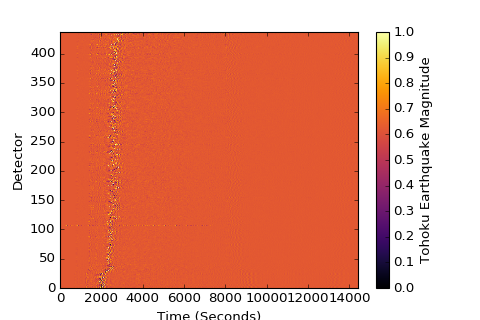

In [46]:
make_spect()

## Defining the call back function for the interactivity of the map and waveform.

In [47]:
## get the station id of station based on selection 

def get_station_id():
     
    if(len(states_map.selected )> 0):
        station_id = states_map.selected[0]
    else:
        station_id = initial_station
    return station_id
### Get the waveform for a station from the starting to 
### the selected interval 

def wave_form_detect(station, time):
    x = range(0, time)
    y = array_vals.iloc[:time][station]
    return x, y

### Update the wave whenever the station is changed. 

def upd_wave_det(self, target):
    #print(states_map.selected)
    #print(target['data'])
    new_x, new_y = wave_form_detect(get_station_id(), slider.value)
    wave.x = new_x
    wave.y = new_y


### Update the wave whenever the time  is changed.     
def upd_wave_time(change):
    #print(states_map.selected)
    #print(target['data'])
    new_x, new_y = wave_form_detect(get_station_id(), change['new'])
    wave.x = new_x
    wave.y = new_y
    
    
### Define the color in the linear scale of the stations based on the time. 

def get_col(time): 
    #temp = np.array(norm_array_vals.iloc[time].values.flatten())
    #c_map = np.log10(np.nan_to_num(temp))
    temp = norm_array_vals.iloc[time]
    c_map = np.log10(temp)
    return c_map

## update the detector colors whenever the time is changed. 
   
def upd_col_lat(change): 
    #scat_plot.color=get_col(slider.value)
    states_map.color=get_col(slider.value).to_dict()
    #rint(change.new)
    
def upd_wf_title_det(self, target):
    waveform.title = 'Waveform for detector: ' + str(get_station_id()-1000 ) +  ' for duration : 0 - ' + str(slider.value) +' s.'
    
    
def upd_wf_title_time(change):
    #print(change)
    
    waveform.title = 'Waveform for detector: ' + str(get_station_id()-1000) +  ' for duration : 0 - ' + str(slider.value) +' s.'

### Create a slider for selecting the time between 0 to 4hrs: 

In [48]:
time = pd.Series(range(0,array_vals.shape[0]))
#slider = interactive(get_time, interval=(time.min()+1, time.max()+1, 1))
slider =  widgets.IntSlider(min=time.min(), max=time.max(), value=1500, description='Time(s):')
slider.layout = {'min_width':'100%'}
display(slider)

IntSlider(value=1500, description='Time(s):', layout=Layout(min_width='100%'), max=14400)

In [49]:
### Creating Maps using bqplot

### projecttion for the USA states map. 
sc_geo = AlbersUSA()
sc_geo.scale_factor=1080


states_map = Map(map_data=topo_load('map_data/TransportableArrMap.json'),
                #map_data=topo_load('map_data/USStatesMap.json'),
                 scales={'projection': sc_geo,'color': ColorScale(scheme='PuRd')},
                 color = get_col(slider.value).to_dict(),
                 interactions = {'click': 'select'},
                 selected_style={'opacity':5, 'fill': 'Green', 'stroke': 'white'},
                 unselected_style={'opacity': 1.0},
                 hovered_styles={'hovered_fill':'Orange'})

## setting the hover highlight to false: 
states_map.hover_highlight=False
states_map.selected_styles = {'selected_fill': 'Red', 'selected_stroke': 'Orange', 'selected_stroke_width': 10.0}

def sel_one_state(self, target):
    if(len(states_map.selected) == 0):
           states_map.selected=[]          
    if (len(states_map.selected)>0):
        if(target['data']['id'] < 1000):
            states_map.selected=[]
        else:
            states_map.selected=[]
            states_map.selected=[target['data']['id']]    
        
### Callback function call for selecting one point 
states_map.on_element_click(sel_one_state)


### setup the axes for the color scale 
col_sc = ColorScale(scheme='PuRd', scale_type='linear', min = array_vals.min().min(),max =array_vals.max().max() )
ax_c = ColorAxis(scale=col_sc, label='Tohoku Earthquake Magnitude',side='left',tick_format='0.3f')

### 
detector_loc = Figure(marks=[states_map],axes=[ax_c], title='Location of earthquake detectors in USA.')
#map_fig = Figure(marks=[states_map],axes=[ax_c] ,title='US States Map Example')

detector_loc

Figure(axes=[ColorAxis(label='Tohoku Earthquake Magnitude', scale=ColorScale(max=1.0, min=-1.6588000000000001, scheme='PuRd'), side='left', tick_format='0.3f')], fig_margin={'right': 60, 'left': 60, 'top': 60, 'bottom': 60}, layout=Layout(min_width='125px'), marks=[Map(color={1024: -0.1865308814350265, 1025: -0.2155488172027642, 1026: -0.20286823424676667, 1027: -0.1710956919813561, 1028: -0.17976117849925033, 1029: -0.211502727789316, 1030: -0.18983494811662352, 1031: -0.22181744347239596, 1032: -0.22425544855299459, 1033: -0.22482933375728092, 1034: -0.2239079251650723, 1035: -0.21052929264626838, 1036: -0.20368795471108098, 1037: -0.20124035218801359, 1038: -0.17728447874398656, 1039: -0.19390093903130914, 1040: -0.20006715545075629, 1041: -0.22460708583966865, 1042: -0.17712972317394829, 1043: -0.22641027028094177, 1044: -0.22404525944312895, 1045: -0.21311984477740942, 1046: -0.20510756143514741, 1047: -0.19997317761659769, 1048: -0.20820861292841367, 1049: -0.20831362587185143, 1050: -0.20969222807611101, 1051: -0.20119362301085789, 1052: -0.21577399315207213, 1053: -0.22592634357081162, 1054: -0.17742700089641811, 1055: -0.23399267717126623, 1056: -0.22717465238075055, 1057: -0.21364018868146198, 1058: -0.21007412579519844, 1059: -0.19989681942135118, 1060: -0.20017876436161505, 1061: -0.20258003311676132, 1062: -0.21205733396579776, 1063: -0.20489169095828244, 1064: -0.21826784487233516, 1065: -0.18227295912697947, 1066: -0.22673034299519881, 1067: -0.17611657784871596, 1068: -0.22551515486762563, 1069: -0.21443084076634977, 1070: -0.21985619581974766, 1071: -0.22252251445976337, 1072: -0.22569282192412832, 1073: -0.22429432278937325, 1074: -0.21547181717982475, 1075: -0.20462967436158969, 1076: -0.21865763218252904, 1077: -0.22918841053456268, 1078: -0.230848689560367, 1079: -0.22429487033867998, 1080: -0.18545152779736965, 1081: -0.19010056500824243, 1082: -0.20839147848757944, 1083: -0.18487035034392785, 1084: -0.21069482972598932, 1085: -0.19626811449945591, 1086: -0.18738226784803083, 1087: -0.18370882736337371, 1088: -0.19120727817021127, 1089: -0.20915596677232978, 1090: -0.21643086385412449, 1091: -0.17757202833123889, 1092: -0.24748403784481077, 1093: -0.15824228880582936, 1094: -0.21615456157883664, 1095: -0.2155147423379275, 1096: -0.22214232046536497, 1097: -0.18603624159863011, 1098: -0.18433264744321223, 1099: -0.19794377252515372, 1100: -0.21489595736443079, 1101: -0.23586120459526225, 1102: -0.23942690480551804, 1103: -0.1675809348467861, 1104: -0.16000712689368646, 1105: -0.16398715573533273, 1106: -0.17869701983857159, 1107: -0.19414811060204723, 1108: -0.19410290446316908, 1109: -0.18952804675424084, 1110: -0.18740942712750597, 1111: -0.2176084615562914, 1112: -0.23646894404911389, 1113: -0.25064331595546024, 1114: -0.16807133988457695, 1115: -0.23415788321474978, 1116: -0.23331570914613711, 1117: -0.24392917779854478, 1118: -0.25038449314665073, 1119: -0.23151291227350584, 1120: -0.2039796616313328, 1121: -0.22567249774468232, 1122: -0.21314759495075086, 1123: -0.22447559932322131, 1124: -0.22012889834644206, 1125: -0.20462972669250568, 1126: -0.19806334196030279, 1127: -0.22030193365552683, 1128: -0.17072284672839763, 1129: -0.24215404213622657, 1130: -0.17125800385434248, 1131: -0.24076131834510248, 1132: -0.22353280267466247, 1133: -0.19556900853504131, 1134: -0.25494659620851051, 1135: -0.15130007275995153, 1136: -0.18375470998586266, 1137: -0.21777860747345174, 1138: -0.19837349974078555, 1139: -0.20789372636575476, 1140: -0.2225508720076185, 1141: -0.22305316188095758, 1142: -0.23923701336042871, 1143: -0.23719315112167799, 1144: -0.23098823666164089, 1145: -0.22763486626507048, 1146: -0.22172381073722822, 1147: -0.245125262068394, 1148: -0.25494659620851051, 1149: -0.19193268027323873, 1150: -0.16245059472862025, 1151: -0.20551331671361317, 1152: -0.18240519501891128, 1153: -0.20666187818198264, 1154: -0.21358676397890272, 1155: -0.22336393929209863, 1156: -0.22718043994042653, 1157: -0.17242

In [50]:
###  SEt the scales for the waveform 

x = LinearScale()
y = LinearScale(min=-1.7, max=1.7)


### create a animation time variable so that the transformation is smooth. 

try:
    ani_time = int(slider.value/10)
except TypeError:
    ani_time = 500


### Create a line plot using the X and Y values. 

wave = Lines(scales={'x': x, 'y': y}, colors=['red'],
               enable_move=False)

ax_x = Axis(scale=x, tick_format='0.f', label = 'Time (seconds)')
ax_y = Axis(scale=y, tick_format='0.3f', label = 'Magnitude', orientation='vertical')

waveform = Figure(marks=[wave], axes=[ax_x, ax_y], 
                title='Waveform:',
                animation_duration=ani_time)

# Calculate the waveform for the station for default values...

initial_station = np.random.randint(1000,1000 + len(locations))
initial_timeinterval= np.random.randint(10, len(array_vals))

### CFill the plot for the first time 
wave.x, wave.y = wave_form_detect(initial_station, initial_timeinterval)
waveform.title = 'Waveform for detector: ' + str(initial_station - 1000) +  ' for duration : 0 - ' + str(slider.value) +' s.'


#waveform

In [51]:
### Function calls for the callbacks. 

## The below function updates the wave on 
## selection of the detector. 
states_map.on_element_click(upd_wave_det)

## For updating the title with time and station 
states_map.on_element_click(upd_wf_title_det)

## For updating the color of the station based on slider valus 
slider.observe(upd_col_lat, names='value')

## For updating the title of the wavefor  based on slider valus 
slider.observe(upd_wf_title_time, names='value')

## For updating the waveform based on slider valus 
slider.observe(upd_wave_time, names='value')

In [52]:
def display_canvas():
    ## Plot the spectogram 
    make_spect()

    ## display the sliders 
    #H1 = widgets.HBox([ipywidgets.HTML("00:00:00"), slider, ipywidgets.HTML("04:00:00")])
    states_map.selected=[]

    display(slider)

    wave.x, wave.y = wave_form_detect(initial_station, initial_timeinterval)

    waveform.title = 'Waveform for detector: ' + str(initial_station-1000) + ' for duration : 0 - ' + str(slider.value) +' s.'

In [53]:
## make waveform and detector plot side by side 
plots = widgets.HBox( children=[waveform,detector_loc ])
#plots

In [54]:
### For Part 2 creation of Movie. 

## Create a play button
## step up the min and max values with the step of 100s 
time_interval = 60

play_button = Play(min=1000, max=14400,step=100, interval=time_interval)
jslink((play_button, 'value'), (slider, 'value'))

play_button.interval

60

<IPython.core.display.Javascript object>


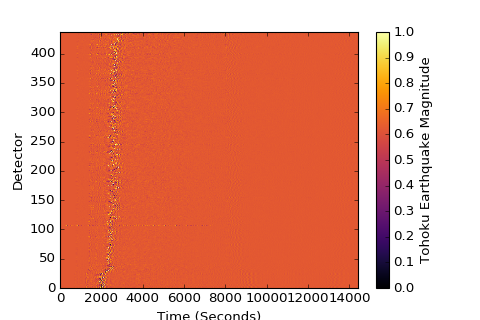

IntSlider(value=1000, description='Time(s):', layout=Layout(min_width='100%'), max=14400)

VBox(children=(HBox(children=(Play(value=1000, interval=60, max=14400, min=1000, step=100),)), HBox(children=(Figure(animation_duration=150, axes=[Axis(label='Time (seconds)', scale=LinearScale(), side='bottom', tick_format='0.f'), Axis(label='Magnitude', orientation='vertical', scale=LinearScale(max=1.7, min=-1.7), side='left', tick_format='0.3f')], fig_margin={'right': 60, 'left': 60, 'top': 60, 'bottom': 60}, layout=Layout(min_width='125px'), marks=[Lines(colors=['red'], interactions={'hover': 'tooltip'}, scales={'y': LinearScale(max=1.7, min=-1.7), 'x': LinearScale()}, scales_metadata={'x': {'orientation': 'horizontal', 'dimension': 'x'}, 'color': {'dimension': 'color'}, 'y': {'orientation': 'vertical', 'dimension': 'y'}}, tooltip_style={'opacity': 0.9}, x=array([    0,     1,     2, ..., 11014, 11015, 11016]), y=array([  6.26170000e-05,  -7.07380000e-06,  -7.46830000e-05, ...,
         1.61350000e-02,   1.65130000e-02,   1.67120000e-02]))], scale_x=LinearScale(allow_padding=False, max=1.0, min=0.0), scale_y=LinearScale(allow_padding=False, max=1.0, min=0.0), title='Waveform for detector: 401 for duration : 0 - 1000 s.'), Figure(axes=[ColorAxis(label='Tohoku Earthquake Magnitude', orientation='vertical', scale=ColorScale(max=1.0, min=-1.6588000000000001, scheme='PuRd'), side='left', tick_format='0.3f')], fig_margin={'right': 60, 'left': 60, 'top': 60, 'bottom': 60}, layout=Layout(min_width='125px'), marks=[Map(color={1024: -0.20536714557317232, 1025: -0.20359379054702598, 1026: -0.20400066770356698, 1027: -0.20228986304313745, 1028: -0.20138005048645299, 1029: -0.20031164484803624, 1030: -0.21017747069426751, 1031: -0.20287626066166106, 1032: -0.20356223302065912, 1033: -0.20371944304249995, 1034: -0.20393135674535343, 1035: -0.20404895416928537, 1036: -0.20399045193705215, 1037: -0.20291980915416152, 1038: -0.20208493955204906, 1039: -0.2011357377247385, 1040: -0.20965834491683993, 1041: -0.2018001950679712, 1042: -0.20707874584064453, 1043: -0.20362558531187472, 1044: -0.20392644557055711, 1045: -0.20437866319436007, 1046: -0.20373440471647786, 1047: -0.202481656600594, 1048: -0.20545750058496143, 1049: -0.20558002233241018, 1050: -0.20535886331568334, 1051: -0.20897832910597564, 1052: -0.20104049039289928, 1053: -0.20092243345937053, 1054: -0.20747489088466448, 1055: -0.20376213609304955, 1056: -0.20372782464976694, 1057: -0.20376007315190822, 1058: -0.20357447466725639, 1059: -0.20439275845520219, 1060: -0.20387446366785977, 1061: -0.20484017413365058, 1062: -0.20419779282571704, 1063: -0.20489169095828244, 1064: -0.20062082051645547, 1065: -0.20813290326847653, 1066: -0.20215101655484052, 1067: -0.20607567952942643, 1068: -0.20410432821294711, 1069: -0.20305738957217115, 1070: -0.20062885735370972, 1071: -0.20275460342552168, 1072: -0.20339206028314114, 1073: -0.20472701553458178, 1074: -0.20389551689486496, 1075: -0.20323395152457088, 1076: -0.20165412470292882, 1077: -0.2022566565834801, 1078: -0.20333004640723071, 1079: -0.20382337596076661, 1080: -0.20611198856012761, 1081: -0.20560535427271037, 1082: -0.20449164734940095, 1083: -0.20083605168581492, 1084: -0.20684667081997582, 1085: -0.20744039021083768, 1086: -0.20827351742907893, 1087: -0.20660680793664452, 1088: -0.20498292605680521, 1089: -0.2074891396725555, 1090: -0.19794506081345251, 1091: -0.21619621068883041, 1092: -0.19527979608976712, 1093: -0.20591640722845625, 1094: -0.19916084568335984, 1095: -0.20145796868531138, 1096: -0.20223453770187436, 1097: -0.20648446920780406, 1098: -0.20557081823560125, 1099: -0.2035386903547107, 1100: -0.20103867388929736, 1101: -0.19607027080733563, 1102: -0.19639851992751708, 1103: -0.21073277419506414, 1104: -0.20690398092403303, 1105: -0.20221241994673947, 1106: -0.20397561207004433, 1107: -0.19710024933786141, 1108: -0.20676756952513609, 1109: -0.20312218059245227, 1110: -0.2056979883983481, 1111: -0.2058890365431473, 1112: -0.19907378023230221, 1113: -0.19658623899763769, 1114: -0.21078478738541787, 1115: -0.2042155

In [55]:
display_canvas()
VBox([HBox([play_button]), plots])